In [5]:
# opt4_4.py
# coding:utf-8
# 设损失函数 loss=(w+1)^2,令w初始值为5
# 反向传播就是求最优 w，即求最小loss对应的w值
import tensorflow as tf

# 定义待优化参数 w 初值为 5
w = tf.Variable(tf.constant(5, dtype=tf.float32))
# 定义损失函数loss
loss = tf.square(w+1)
# 定义反向传播方法
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

# 生成会话，训练40轮
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    for i in range(40):
        sess.run(train_step)
        w_val = sess.run(w)
        loss_val = sess.run(loss)
        print("After %s steps: w is %f,  loss is %f."%(i, w_val, loss_val))

After 0 steps: w is 2.600000,  loss is 12.959999.
After 1 steps: w is 1.160000,  loss is 4.665599.
After 2 steps: w is 0.296000,  loss is 1.679616.
After 3 steps: w is -0.222400,  loss is 0.604662.
After 4 steps: w is -0.533440,  loss is 0.217678.
After 5 steps: w is -0.720064,  loss is 0.078364.
After 6 steps: w is -0.832038,  loss is 0.028211.
After 7 steps: w is -0.899223,  loss is 0.010156.
After 8 steps: w is -0.939534,  loss is 0.003656.
After 9 steps: w is -0.963720,  loss is 0.001316.
After 10 steps: w is -0.978232,  loss is 0.000474.
After 11 steps: w is -0.986939,  loss is 0.000171.
After 12 steps: w is -0.992164,  loss is 0.000061.
After 13 steps: w is -0.995298,  loss is 0.000022.
After 14 steps: w is -0.997179,  loss is 0.000008.
After 15 steps: w is -0.998307,  loss is 0.000003.
After 16 steps: w is -0.998984,  loss is 0.000001.
After 17 steps: w is -0.999391,  loss is 0.000000.
After 18 steps: w is -0.999634,  loss is 0.000000.
After 19 steps: w is -0.999781,  loss is 0.

In [10]:
# opt4_5.py
# coding:utf-8
# 设损失函数 loss=(w+1)^2,令w初始值为10
# 反向传播就是求最优 w，即求最小loss对应的w值
# 使用指数衰减的学习率，在迭代初期得到较高的下降速度，在较小的迭代轮数下取得更好的收敛

import tensorflow as tf

LEARNINF_RATE_BASE = 0.1 #最初学习率
LEARNING_RATE_DECAY = 0.99 #学习率衰减率
LEARNING_RATE_STEP = 1 # 喂入多少轮BATCH_SIZE后，更新一次学习率，一般设置：总样本数/BATCH_SIZE   

# 运行了几轮BATCH_SIZE 的计数器，初始值为0，设为不被训练
global_step = tf.Variable(0, trainable=False)
# 定义指数下降学习率
learning_rate = tf.train.exponential_decay(LEARNINF_RATE_BASE, 
                                           global_step,
                                          LEARNING_RATE_STEP,
                                          LEARNING_RATE_DECAY,
                                          staircase=True)
# 定义待优化参数 w 初值为 10
w = tf.Variable(tf.constant(10, dtype=tf.float32))
# 定义损失函数loss
loss = tf.square(w+1)
# 定义反向传播方法
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

# 生成会话，训练100轮
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    for i in range(100):
        sess.run(train_step)
        learning_rate_val = sess.run(learning_rate)
        global_step_val = sess.run(global_step)
        w_val = sess.run(w)
        loss_val = sess.run(loss)
        print("After %s steps: global_step is %f, w is %f, learning rate is %f, loss is %f."%(i, global_step_val,w_val, learning_rate_val, loss_val))

After 0 steps: global_step is 1.000000, w is 7.800000, learning rate is 0.099000, loss is 77.440002.
After 1 steps: global_step is 2.000000, w is 6.057600, learning rate is 0.098010, loss is 49.809719.
After 2 steps: global_step is 3.000000, w is 4.674169, learning rate is 0.097030, loss is 32.196194.
After 3 steps: global_step is 4.000000, w is 3.573041, learning rate is 0.096060, loss is 20.912704.
After 4 steps: global_step is 5.000000, w is 2.694472, learning rate is 0.095099, loss is 13.649122.
After 5 steps: global_step is 6.000000, w is 1.991791, learning rate is 0.094148, loss is 8.950810.
After 6 steps: global_step is 7.000000, w is 1.428448, learning rate is 0.093207, loss is 5.897361.
After 7 steps: global_step is 8.000000, w is 0.975754, learning rate is 0.092274, loss is 3.903603.
After 8 steps: global_step is 9.000000, w is 0.611130, learning rate is 0.091352, loss is 2.595741.
After 9 steps: global_step is 10.000000, w is 0.316771, learning rate is 0.090438, loss is 1.73

In [1]:
# opt4_6.py
# coding:utf-8
import tensorflow as tf
# 1. 定义变量及滑动平均类
# 定义float32的浮点变量，初始值为0.0
# 这个代码就是不断更新w1参数，优化w1参数，滑动平均做了w1的影子
w1 = tf.Variable(0, dtype=tf.float32)
# 定义 num_update (NN的迭代轮数)，初始值：0，不可被优化，这个参数不训练
global_step = tf.Variable(0, trainable=False)
# 实例化滑动平均类，给衰减率设为0.99，当前轮数global_step
MOVING_AVERAGE_DECAY = 0.99
ema = tf.train.ExponentialMovingAverage(MOVING_AVERAGE_DECAY, 
                                        global_step)
# ema.apply后的括号里是更新列表，每次运行sess.run(ema_op)时，
# 对更新列表中的元素求欢动平均值
# 在实际应用中会使用tf.trainable_variables()自动将所有待训练的参数汇总为列表
# ema_op = ema.apply([w1])
ema_op = ema.apply(tf.trainable_variables())

# 2. 查看不同迭代中变量取值的变化
with tf.Session() as sess:
    # 初始化
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    # 用ema.average(w1)获取w1滑动平均值
    # （要运行多个节点，作为列表中的元素列出，写在sess.run中）
    # 打印出当前的参数w1和w1的滑动平均值
    print(sess.run([w1, ema.average(w1)]))
    
    # 参数w1赋值为1
    sess.run(tf.assign(w1, 1))
    sess.run(ema_op)
    print(sess.run([w1, ema.average(w1)]))
    
    # 更新step和w1的值，模拟出100轮迭代，参数w1变为10
    sess.run(tf.assign(global_step, 100))
    sess.run(tf.assign(w1, 10))
    sess.run(ema_op)
    
    # 每次sess.run()会更新一次w1的滑动平均值
    sess.run(ema_op)
    print(sess.run([w1, ema.average(w1)]))
    
    sess.run(ema_op)
    print(sess.run([w1, ema.average(w1)]))
    
    sess.run(ema_op)
    print(sess.run([w1, ema.average(w1)]))
    
    sess.run(ema_op)
    print(sess.run([w1, ema.average(w1)]))
    
    sess.run(ema_op)
    print(sess.run([w1, ema.average(w1)]))
    
    
    

/home/berlin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[0.0, 0.0]
[1.0, 0.9]
[10.0, 2.3281732]
[10.0, 2.955868]
[10.0, 3.532206]
[10.0, 4.061389]
[10.0, 4.547275]


X=
 [[-4.16757847e-01 -5.62668272e-02]
 [-2.13619610e+00  1.64027081e+00]
 [-1.79343559e+00 -8.41747366e-01]
 [ 5.02881417e-01 -1.24528809e+00]
 [-1.05795222e+00 -9.09007615e-01]
 [ 5.51454045e-01  2.29220801e+00]
 [ 4.15393930e-02 -1.11792545e+00]
 [ 5.39058321e-01 -5.96159700e-01]
 [-1.91304965e-02  1.17500122e+00]
 [-7.47870949e-01  9.02525097e-03]
 [-8.78107893e-01 -1.56434170e-01]
 [ 2.56570452e-01 -9.88779049e-01]
 [-3.38821966e-01 -2.36184031e-01]
 [-6.37655012e-01 -1.18761229e+00]
 [-1.42121723e+00 -1.53495196e-01]
 [-2.69056960e-01  2.23136679e+00]
 [-2.43476758e+00  1.12726505e-01]
 [ 3.70444537e-01  1.35963386e+00]
 [ 5.01857207e-01 -8.44213704e-01]
 [ 9.76147160e-06  5.42352572e-01]
 [-3.13508197e-01  7.71011738e-01]
 [-1.86809065e+00  1.73118467e+00]
 [ 1.46767801e+00 -3.35677339e-01]
 [ 6.11340780e-01  4.79705919e-02]
 [-8.29135289e-01  8.77102184e-02]
 [ 1.00036589e+00 -3.81092518e-01]
 [-3.75669423e-01 -7.44707629e-02]
 [ 4.33496330e-01  1.27837923e+00]
 [-6.34679305e-0

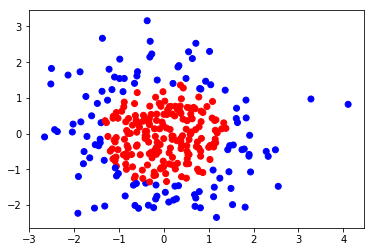

After 0 steps, loss is: 3.626566.
After 2000 steps, loss is: 0.371192.
After 4000 steps, loss is: 0.219549.
After 6000 steps, loss is: 0.168227.
After 8000 steps, loss is: 0.138529.
After 10000 steps, loss is: 0.117420.
After 12000 steps, loss is: 0.105151.
After 14000 steps, loss is: 0.097440.
After 16000 steps, loss is: 0.092904.
After 18000 steps, loss is: 0.089814.
After 20000 steps, loss is: 0.087172.
After 22000 steps, loss is: 0.085058.
After 24000 steps, loss is: 0.083009.
After 26000 steps, loss is: 0.080988.
After 28000 steps, loss is: 0.079513.
After 30000 steps, loss is: 0.078416.
After 32000 steps, loss is: 0.077659.
After 34000 steps, loss is: 0.077031.
After 36000 steps, loss is: 0.076309.
After 38000 steps, loss is: 0.075782.
w1:
 [[-0.49985832 -0.800531    2.021739   -1.0867816   0.20671777 -0.32818365
   1.2781619  -1.1054847   1.757044    2.571352   -0.9408666 ]
 [-0.94751596 -1.3983947  -0.22796275 -0.9073044   0.32553163 -0.5862704
   0.5900801  -0.5178211  -0.3211

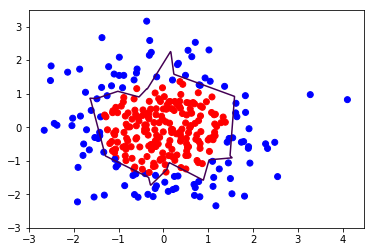

After 0 steps, loss is: 4.243130.
After 2000 steps, loss is: 1.170094.
After 4000 steps, loss is: 0.364663.
After 6000 steps, loss is: 0.139817.
After 8000 steps, loss is: 0.102583.
After 10000 steps, loss is: 0.094123.
After 12000 steps, loss is: 0.088637.
After 14000 steps, loss is: 0.085405.
After 16000 steps, loss is: 0.083253.
After 18000 steps, loss is: 0.081770.
After 20000 steps, loss is: 0.080733.
After 22000 steps, loss is: 0.079730.
After 24000 steps, loss is: 0.078616.
After 26000 steps, loss is: 0.077285.
After 28000 steps, loss is: 0.075231.
After 30000 steps, loss is: 0.074478.
After 32000 steps, loss is: 0.074172.
After 34000 steps, loss is: 0.074111.
After 36000 steps, loss is: 0.074061.
After 38000 steps, loss is: 0.074067.
w1:
 [[ 3.9515640e-03 -6.9990045e-01  2.3428208e-01  5.7339400e-01
   1.0436344e-02 -2.7983576e-01  1.4960110e-01  5.6768769e-33
   3.9229637e-01  1.4059833e-01 -2.6263598e-01]
 [-3.3081815e-02 -2.8137484e-01 -4.7175980e-01 -7.3337704e-01
  -3.4460

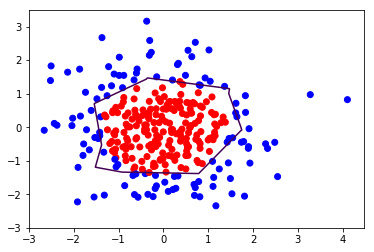

In [21]:
# opt4_6.py
# coding:utf-8
# 0. 导入模块，生成模拟数据集
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

BATCH_SIZE = 30
seed = 2

# 基于 seed 产生随机数
rdm = np.random.RandomState(seed)
# 随机数返回300行2列的矩阵，表示300组坐标点（x0，x1）作为输入数据集
X = rdm.randn(300, 2)
# 从X中抽取一行；判断如果两个坐标的平方和小于2，给Y赋值为1其余为0
# 作为输入数据集的标签（正确答案）
Y_ = [int(x0**2 + x1**2 < 2) for (x0,x1) in X]
# 遍历Y中的每个元素，1赋值为'red'，其余赋值'blue'，这样可视化显示时可直观区分
Y_c = [['red' if y else 'blue'] for y in Y_]
# 对数据集X和标签Y进行shape整理，第一行元素为-1表示，随第二个参数计算得到，
#第二个元素表示多少列，把X整理为n行2列，把Y整理为n行1列
X = np.vstack(X).reshape(-1, 2)
Y_ = np.vstack(Y_).reshape(-1, 1)
print('X=\n',X, '\nY_=\n',Y_, '\nY_c=\n',Y_c)

# 用plt.scatter画出数据集X各行中第0列与第1列元素的点（x0，x1），用各行Y_C对应的颜色++++++++++++++
plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c))
plt.show()

# 定义神经网络的输入、参数和输出，定义前向传播过程
def get_weight(shape, regularizer):
    w = tf.Variable(tf.random_normal(shape), dtype=tf.float32)
    tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(regularizer)(w))
    return w

def get_bias(shape):
    b = tf.Variable(tf.constant(0.01, shape=shape))
    return b

x = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))

w1 = get_weight([2,11], 0.01)
b1 = get_bias([11])
y1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w2 = get_weight([11,1], 0.01)
b2 = get_bias([1])
y = tf.matmul(y1, w2) + b2  #输出层不过激活函数

# 定义损失函数
loss_mse = tf.reduce_mean(tf.square(y - y_))
loss_total = loss_mse + tf.add_n(tf.get_collection('losses'))

# 定义反向传播方法：不含正则化
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_mse)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 40000
    for i in range(STEPS):
        start = (i*BATCH_SIZE) % 300
        end = start + BATCH_SIZE
        sess.run(train_step, feed_dict={x:X[start:end], y_:Y_[start:end]})
        if i % 2000 == 0:
            loss_mse_v = sess.run(loss_mse, feed_dict={x:X, y_:Y_})
            print("After %d steps, loss is: %f."%(i, loss_mse_v))
            
    # xx在-3到3之间以步长为0.01， yy在-3到3之间以步长0.01，生成二维网络坐标点
    xx, yy = np.mgrid[-3:3:0.01, -3:3:0.01]
    # 将xx, yy拉直，并合并成一个2列的矩阵，得到一个网格坐标点的集合
    grid = np.c_[xx.ravel(), yy.ravel()]
    # 将网络坐标点喂入神经网络， probs为输出
    probs = sess.run(y, feed_dict={x:grid})
    # probs的shape调整成xx的样子
    probs = probs.reshape(xx.shape)
    print("w1:\n", sess.run(w1))
    print("b1:\n", sess.run(b1))
    print("w2:\n", sess.run(w2))
    print("b2:\n", sess.run(b2))

plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c))
plt.contour(xx, yy, probs, levels=[.5])
plt.show()
    
# 定义反向传播方法：含正则化
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_total)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 40000
    for i in range(STEPS):
        start = (i*BATCH_SIZE) % 300
        end = start + BATCH_SIZE
        sess.run(train_step, feed_dict={x:X[start:end], y_:Y_[start:end]})
        if i % 2000 == 0:
            loss_mse_v = sess.run(loss_mse, feed_dict={x:X, y_:Y_})
            print("After %d steps, loss is: %f."%(i, loss_mse_v))
            
    # xx在-3到3之间以步长为0.01， yy在-3到3之间以步长0.01，生成二维网络坐标点
    xx, yy = np.mgrid[-3:3:0.01, -3:3:0.01]
    # 将xx, yy拉直，并合并成一个2列的矩阵，得到一个网格坐标点的集合
    grid = np.c_[xx.ravel(), yy.ravel()]
    # 将网络坐标点喂入神经网络， probs为输出
    probs = sess.run(y, feed_dict={x:grid})
    # probs的shape调整成xx的样子
    probs = probs.reshape(xx.shape)
    print("w1:\n", sess.run(w1))
    print("b1:\n", sess.run(b1))
    print("w2:\n", sess.run(w2))
    print("b2:\n", sess.run(b2))

plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c))
plt.contour(xx, yy, probs, levels=[.5])
plt.show()
    





